In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df = pd.read_excel(r'D:\Data sets\Index_dataset.xlsx')

In [134]:
df

,Unnamed: 0,year,month,interest_rate,unemployeent_rate,index
0,1,2017,12,2.75,5.3,1464
1,2,2017,11,2.50,5.3,1353
2,3,2017,10,2.50,5.3,1236
3,4,2017,6,2.50,5.3,1245
4,5,2017,5,2.50,5.6,1159
5,6,2017,9,2.50,5.5,1163
6,7,2017,4,2.25,5.5,1130
7,8,2017,2,2.25,5.5,1140
8,9,2017,12,2.25,5.5,1047
9,10,2017,4,2.00,5.5,1063


In [135]:
df = df.drop(columns= ['Unnamed: 0', 'year', 'month'], axis= 1)

In [136]:
df.head()

,interest_rate,unemployeent_rate,index
0,2.75,5.3,1464
1,2.50,5.3,1353
2,2.50,5.3,1236
3,2.50,5.3,1245
4,2.50,5.6,1159


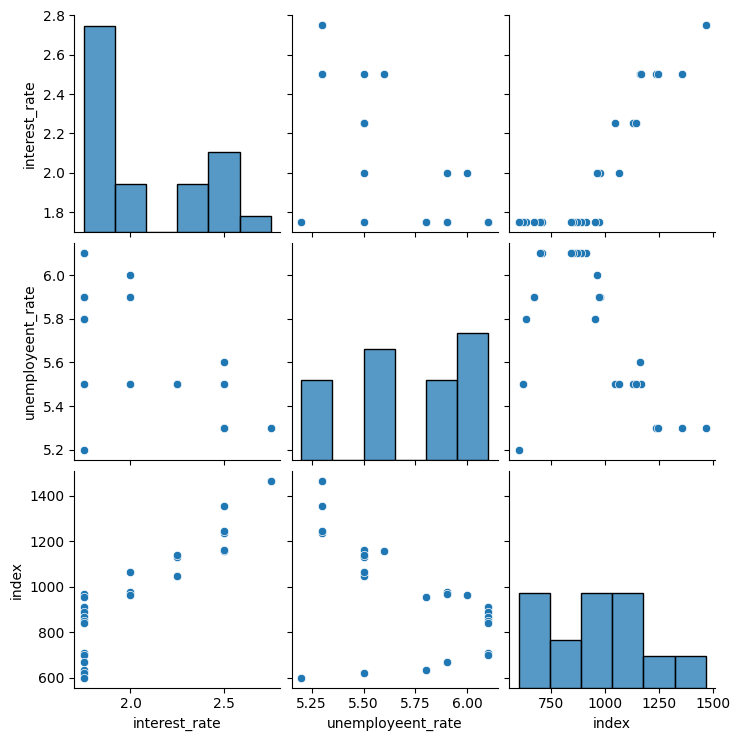

In [137]:
# visualiziting the relation between the features:

sns.pairplot(df)

In [138]:
df.corr()

,interest_rate,unemployeent_rate,index
interest_rate,1.000000,-0.718512,0.895282
unemployeent_rate,-0.718512,1.000000,-0.535050
index,0.895282,-0.535050,1.000000


<Axes: >

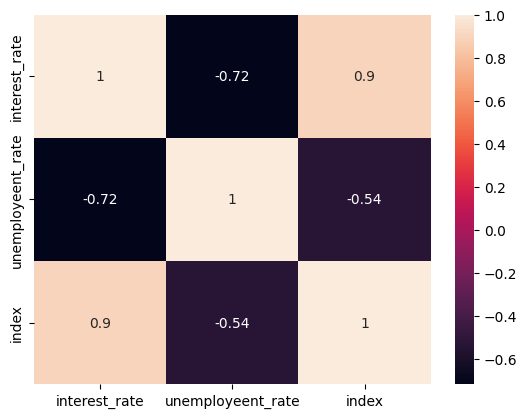

In [139]:
sns.heatmap(df.corr(), annot= True)

In [140]:
# independent and dependent features:

x = df[['interest_rate', 'unemployeent_rate']] #independent feature
y = df['index'] #dependent feature

In [141]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.25, random_state= 42)

In [142]:
# standardizing dataponts of independent features:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(x_train)
scaler.transform(x_test)

array([[ 0.66899361, -0.73091631],
       [-0.83624201,  1.1048735 ],
       [ 2.17422923, -1.34284625],
       [-0.83624201, -0.73091631],
       [-0.0836242 ,  0.79890853],
       [-0.0836242 , -0.73091631],
       [-0.83624201,  0.18697859]])

In [143]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

In [144]:
regression.fit(x_train, y_train)

LinearRegression()

In [145]:
# cross validation:

from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(regression, x_train, y_train, cv = 5, scoring='neg_mean_squared_error')

In [146]:
np.mean(cross_val)

np.float64(-13000.154918005599)

In [147]:
y_pred = regression.predict(x_test)

In [148]:
y_pred

array([1078.03878986,  810.43539208, 1416.73901582,  703.7901498 ,
        979.78550506,  890.91446983,  757.11277094])

In [149]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)


11758.196206570228
86.63039943569694
108.4352166344967


In [150]:
# R-Score

from sklearn.metrics import r2_score

rscore = r2_score(y_test, y_pred)
rscore

0.7870238447893936

In [151]:
# prediction for new data

regression.predict(scaler.fit_transform(np.array([[2.75, 5.3]])))


d:\Udemy_python_practise\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-1583.66147795])

## ASSUMPTIONS

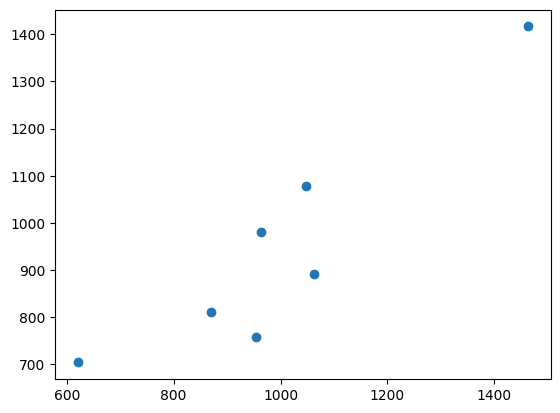

In [152]:
plt.scatter(y_test, y_pred)

### If there is a linear relaion between ytest and ypred then our model hs performed well

In [153]:
residual = y_pred - y_test
print(residual)

8      31.038790
16    -58.564608
0     -47.260984
23     83.790150
11     16.785505
9    -172.085530
13   -196.887229
Name: index, dtype: float64


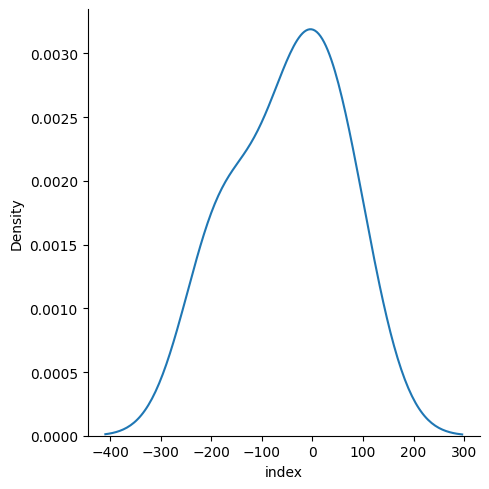

In [154]:
sns.displot(residual, kind = 'kde')

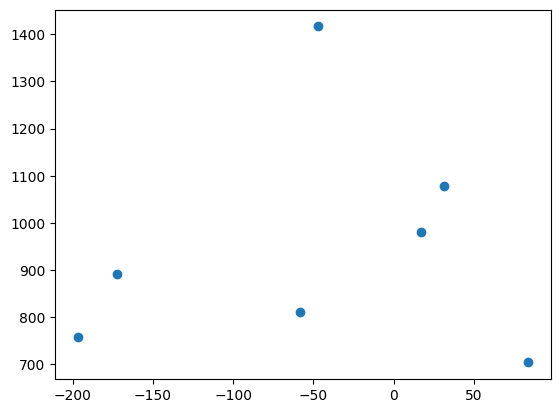

In [155]:
# scatter 

plt.scatter(residual, y_pred)

In [156]:
# ols

import statsmodels.api as sm

model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  index   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              706.8
Date:                Thu, 27 Feb 2025   Prob (F-statistic):                    2.46e-16
Time:                        12:16:04   Log-Likelihood:                         -109.10
No. Observations:                  18   AIC:                                      222.2
Df Residuals:                      16   BIC:                                      224.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

d:\Udemy_python_practise\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [157]:
print(regression.coef_)

[748.49728011 177.74207047]
